In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

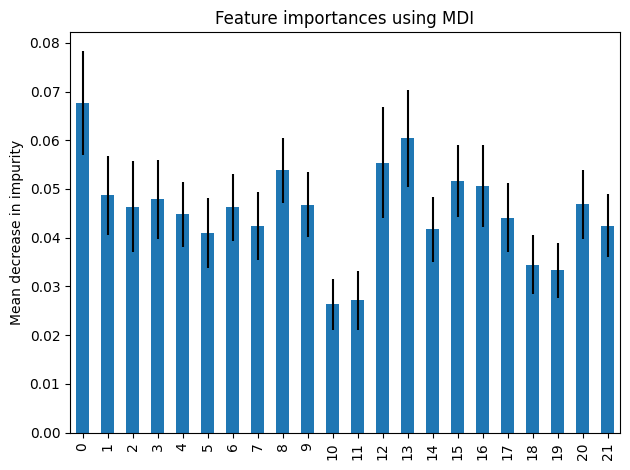

In [19]:
random_forest = load('models/random_forest.joblib')

importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index=range(22))
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

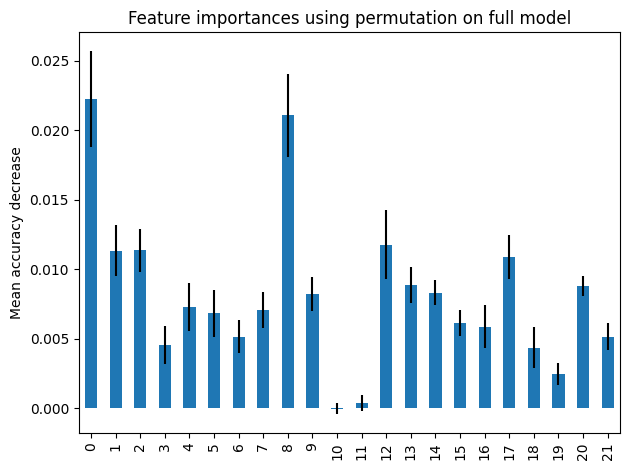

In [22]:
from sklearn.inspection import permutation_importance

X_test = np.load('../data/X_test_all_indices.npy')
y_test = np.load('../data/y_test.npy')

result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=range(22))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()